<a href="https://colab.research.google.com/github/Itsnekesa/Itsnekesa/blob/main/TELCO_CUSTOMER_CHUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive/")

Mounted at /content/drive/


This is a notebook for Data Modelling of Telco Customer Chum.
Analyzing a telecommunications dataset to predict customer chum with machine learning.
Build &evaluate machine learning models.
create impactful data visualizations.
Showcase your findings in a clear report.

In [24]:
!pip install pandas


In [25]:
!pip show pandas

Name: pandas
Version: 2.0.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: 
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials provided with the distrib

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
%matplotlib inline


data = files.upload()




Saving TELECOM.csv to TELECOM.csv


read data from the data dictionary into a pandas data frame.

In [28]:
df = pd.read_csv(io.StringIO(data['TELECOM.csv'].decode('utf-8')))

Understanding the dataset

In [29]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [30]:
print(df.tail())


      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes  

Data preprocessing


In [31]:
# Handling missing values
df.fillna(method='ffill', inplace=True)
df = pd.get_dummies(df, drop_first=True)

DATA ANALYSIS

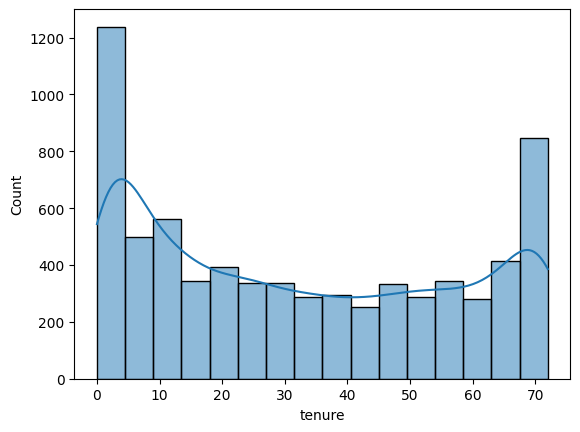

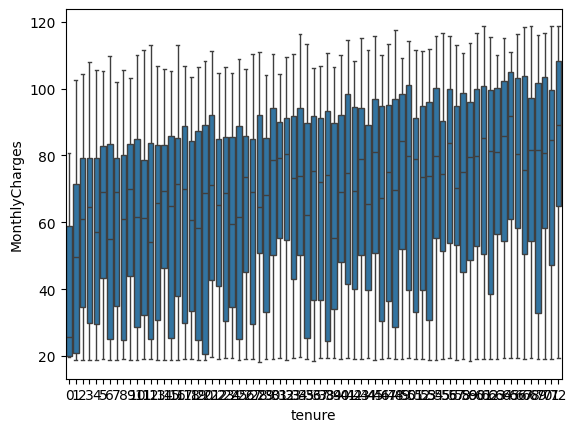

In [32]:
# Visualizing the distribution of 'tenure'
sns.histplot(df['tenure'], kde=True)
plt.show()

# Relationship between 'MonthlyCharges' and 'tenure'
sns.boxplot(x='tenure', y='MonthlyCharges', data=df)
plt.show()

In [33]:
#column names
print(df.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE', 'customerID_0014-BMAQU',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn_Yes'],
      dtype='object', length=13602)


In [34]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 13602 entries, SeniorCitizen to Churn_Yes
dtypes: bool(13599), float64(1), int64(2)
memory usage: 91.5 MB


In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [36]:
#creating a new feature tenure group
df['TenureGroup']=pd.cut(df['tenure'],bins=[0,12,24,36,48,60,72],  labels=['0-1Y'
,'1-2Y',  '3-4Y',  '4-5Y', '5-6Y', '6-7Y' ])

In [41]:


from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X = df.drop('tenure', axis=1)
y = df['tenure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)



Train set: (5282, 13602) (5282,)
Test set: (1761, 13602) (1761,)


In [46]:
df.describe

<bound method NDFrame.describe of       SeniorCitizen  tenure  MonthlyCharges  customerID_0003-MKNFE  \
0                 0     1.0           29.85                  False   
1                 0    34.0           56.95                  False   
2                 0     2.0           53.85                  False   
3                 0    45.0           42.30                  False   
4                 0     2.0           70.70                  False   
...             ...     ...             ...                    ...   
7038              0    24.0           84.80                  False   
7039              0    72.0          103.20                  False   
7040              0    11.0           29.60                  False   
7041              1     4.0           74.40                  False   
7042              0    66.0          105.65                  False   

      customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                     False                  False                  False   
1                     False                  False                  False   
2                     False                  False                  False   
3                     False                  False                  False   
4                     False                  False                  False   
...                     ...                    ...                    ...   
7038                  False                  False                  False   
7039                  False                  False                  False   
7040                  False                  False                  False   
7041                  False                  False                  False   
7042                  False                  False                  False   

      customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  \
0                     False                  False                  False   
1                     False                  False                  False   
2                     False                  False                  False   
3                     False                  False                  False   
4                     False                  False                  False   
...                     ...                    ...                    ...   
7038                  False                  False                  False   
7039                  False                  False                  False   
7040                  False                  False                  False   
7041                  False                  False                  False   
7042                  False                  False                  False   

      ...  TotalCharges_996.85  TotalCharges_996.95  TotalCharges_997.65  \
0     ...                False                False                False   
1     ...                False                False                False   
2     ...                False                False                False   
3     ...                False                False                False   
4     ...                False                False                False   
...   ...                  ...                  ...                  ...   
7038  ...                False                False                False   
7039  ...                False                False                False   
7040  ...                False                False                False   
7041  ...                False                False                False   
7042  ...                False                False                False   

      TotalCharges_997.75  TotalCharges_998.1  TotalCharges_999.45  \
0                   False               False                False   
1                   False               False                False   
2                   False               False                False   
3                   False               False                False   
4           